# Appliction: A Face Dection Pipeline

This chapter has explored a number of the central concepts and algorithms of machine learning. But moving from these concepts to real-world applications can be a challenge. Real-world datasets are noisy and heterogeneous, may have missing features, and may include data in a form that is difficult to map to a clean `[n_samples'n_features]` matrix. Before applying any of the methods discussed here, you must first extract these features from your data; there is no formula for how to do this that applies across all domains, and thus this is where you as a data scientist must exercise your own intuition and expertise.

One interesting and compelling application of machine learning is to images, and we have already seen a few examples of this where pixel-level features are used for classifation. In the real world, data is rarely so uniform and simple pixels will not be suitable, a fact that has led to a large literature of **feature extraction** methods for image data.

In this section, we will take a look at one such feature extraction techniques, the Histogram of Oriented Gradients (http://bit.ly/2fCEAcb) (HOG), which transforms image pixels into a vector representation that is sensitive to broadly informative image features regardless of confounding factors like illumination. We will use these features to develop a simple face detection pipeline, using machine learning algorithms and concepts we've seen throughout thsi chapter. We begin with the standard imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as npn

C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## HOG Features

The **Histogram of Gradients** is a straightforward feature extraction procedure that was developed in the context of identifying pedestriants within images. HOG involves the following steps:

1. Optionally prenormalize images. This leads to features that resist dependence on variations in illumination.
2. Convolve the image with two filters that are sensitive to horizontal and vertical brightness gradients. These capture edge, contourm, and texture information.
3. Subdivide the image into cells of predetermined size, and compute a histogram of the gradient orientation within each cell.
4. Normalize the histograms in each cell by comparing to the block of neighboring cells. This further suppresses the effect of illuminationb across the image.
5. Construct a one-dimensional feature vector from the information in each cell.

A fast HOG extractor is built into the Scikit-Image project, and we can try it out relatively quickly and visualize the oriented gradients within each cell:

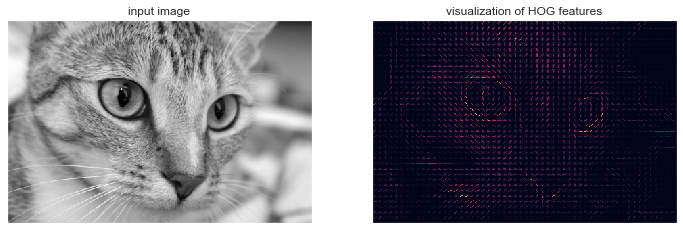

In [6]:
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

## HOG in Action: A Simple Face Detector

Using these HOG features, we can build up a simple facial detection algorithm with any Scikit-Learn estimator; here we will use a linear support vetor machine. The steps are a follows:

1. Obtain a set of image thumbnails of faces to constitute **positive** training samples.
2. Obtain a set of image thumbnails of nonfaces to constitute **negative** training samples.
3. Extract HOG features from these traning samples.
4. Train a linear SVM classier on these samples.
5. For an **unknown** image, pass a sliding window across the image, using the model to evaluate wheather that window contains a face or not.
6. If detections overlap, combine them into a single window.

## Caveats and Improvements

If you dig a bit deeper into the preceding code and examples, you'll see that we still have a bit of work before we can claim a production-ready face detector. There are several issues with what we've done, and several improvements that could be made. In particular:

#### Out training set, especially for negative features, is not very complete

The centrak issue is that there are many face-like textures that are not in the training set, and so our current model is very prone to false positives. You can see this if you try out the preceding algorithm of the **full** astronaut image: the current model leads to many false detections in other regions of the image.

We might imagine addressing this by adding a wider variety of images to the negative training set, and this would probably yield some improvements. Another way to address this is to use a more directed approach, such as **hard negative mining**. In hard negative mining, we take a new set of images that our clssifier has not seen, find all the patches representing false positive, and explicitly add them as negative instances in the training set before retraining the classifier. 

#### Our current pipeline searches only one scale



#### We should combine overlapped detection patches

#### The pipeline should be streamlined

#### More recent advances, such as deep learning, should be considered